# Feature Engineering

This notebook is going to look at the New York 2019 airbnb dataset to perform data cleaning and modification through analysis to ensure that the data is ml model ready. The objective is to find features that can be used to predict airbnb pricing for a given geographic location.

In [120]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Let's read in the dataset for airbnb

In [121]:
df = pd.read_csv("listings.csv")
df.head()

id                        listing_url       scrape_id last_scraped  \
0  5456  https://www.airbnb.com/rooms/5456  20220312074014   2022-03-13   
1  5769  https://www.airbnb.com/rooms/5769  20220312074014   2022-03-31   
2  6413  https://www.airbnb.com/rooms/6413  20220312074014   2022-03-31   
3  6448  https://www.airbnb.com/rooms/6448  20220312074014   2022-03-12   
4  8502  https://www.airbnb.com/rooms/8502  20220312074014   2022-03-13   

                                                name  \
0          Walk to 6th, Rainey St and Convention Ctr   
1                                     NW Austin Room   
2                      Gem of a Studio near Downtown   
3  Secluded Studio @ Zilker - King Bed, Bright & ...   
4                            Woodland Studio Lodging   

                                         description  \
0  Great central  location for walking to Convent...   
1  <b>The space</b><br />Looking for a comfortabl...   
2  Great studio apartment, perfect a single perso...   
3  Clean, private space with everything you need ...   
4  <b>The space</b><br />Fully furnished suite wi...   

                               neighborhood_overview  \
0  My neighborhood is ideally located if you want...   
1  Quiet neighborhood with lots of trees and good...   
2  Travis Heights is one of the oldest neighborho...   
3  The neighborhood is fun and funky (but quiet)!...   
4                                                NaN   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/14084884/b5a3...     8028   
1  https://a0.muscache.com/pictures/23822033/ac94...     8186   
2  https://a0.muscache.com/pictures/miso/Hosting-...    13879   
3  https://a0.muscache.com/pictures/4513152/4ffc1...    14156   
4  https://a0.muscache.com/pictures/miso/Hosting-...    25298   

                                  host_url  ... review_scores_communication  \
0   https://www.airbnb.com/users/show/8028  ...                        4.81   
1   https://www.airbnb.com/users/show/8186  ...                        4.94   
2  https://www.airbnb.com/users/show/13879  ...                        4.98   
3  https://www.airbnb.com/users/show/14156  ...                        4.97   
4  https://www.airbnb.com/users/show/25298  ...                        4.86   

  review_scores_location review_scores_value license instant_bookable  \
0                   4.73                4.78     NaN                f   
1                   4.74                4.92     NaN                f   
2                   4.86                4.94     NaN                t   
3                   4.97                4.89     NaN                t   
4                   4.64                4.57     NaN                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              1                                           1   
1                              1                                           0   
2                              1                                           1   
3                              1                                           1   
4                              1                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            1   
2                                            0   
3                                            0   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              3.69  
1                                           0              1.81  
2                                           0              0.78  
3                                           0              2.09  
4                                           0              0.33  

[5 rows x 74 columns]

In [122]:
df.shape

(11972, 74)

In [123]:
#Get the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11972 entries, 0 to 11971
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            11972 non-null  int64  
 1   listing_url                                   11972 non-null  object 
 2   scrape_id                                     11972 non-null  int64  
 3   last_scraped                                  11972 non-null  object 
 4   name                                          11972 non-null  object 
 5   description                                   11808 non-null  object 
 6   neighborhood_overview                         7059 non-null   object 
 7   picture_url                                   11971 non-null  object 
 8   host_id                                       11972 non-null  int64  
 9   host_url                                      11972 non-null 

Let's do a subset of the columns (exclude the ones that are irrelevant to our query)

In [124]:
df_subset = df.loc[:, ~df.columns.isin(['id', 'listing_url', 'scrape_id', 'last_scraped', 'host_id', 'host_url', 'picture_url', 'host_picture_url', 'host_thumbnail_url', 'calendar_last_scraped', 'first_review', 'license', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'host_verifications', 'availability_60', 'availability_90', 'availability_365', 'neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated'])]
df_subset.head()

name  \
0          Walk to 6th, Rainey St and Convention Ctr   
1                                     NW Austin Room   
2                      Gem of a Studio near Downtown   
3  Secluded Studio @ Zilker - King Bed, Bright & ...   
4                            Woodland Studio Lodging   

                                         description  \
0  Great central  location for walking to Convent...   
1  <b>The space</b><br />Looking for a comfortabl...   
2  Great studio apartment, perfect a single perso...   
3  Clean, private space with everything you need ...   
4  <b>The space</b><br />Fully furnished suite wi...   

                               neighborhood_overview  host_name  host_since  \
0  My neighborhood is ideally located if you want...     Sylvia  2009-02-16   
1  Quiet neighborhood with lots of trees and good...  Elizabeth  2009-02-19   
2  Travis Heights is one of the oldest neighborho...       Todd  2009-04-17   
3  The neighborhood is fun and funky (but quiet)!...        Amy  2009-04-20   
4                                                NaN      Karen  2009-07-11   

                  host_location  \
0  Austin, Texas, United States   
1  Austin, Texas, United States   
2  Austin, Texas, United States   
3  Austin, Texas, United States   
4  Austin, Texas, United States   

                                          host_about host_response_time  \
0  I am a licensed Real Estate Broker and owner o...     within an hour   
1  We're easygoing professionals that enjoy meeti...                NaN   
2  We're a young family that likes to travel, we ...     within an hour   
3  We are a family of four (with teenagers, all o...     within an hour   
4  I handle the reservations at the studio on the...       within a day   

  host_response_rate host_acceptance_rate  ... review_scores_rating  \
0               100%                  94%  ...                 4.83   
1                NaN                 100%  ...                 4.90   
2               100%                 100%  ...                 4.97   
3               100%                  98%  ...                 4.97   
4                83%                  29%  ...                 4.53   

  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                   4.87                       4.85                   4.89   
1                   4.90                       4.86                   4.91   
2                   4.99                       4.99                   4.99   
3                   4.97                       4.96                   4.99   
4                   4.49                       4.67                   4.83   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.81                   4.73                4.78   
1                        4.94                   4.74                4.92   
2                        4.98                   4.86                4.94   
3                        4.97                   4.97                4.89   
4                        4.86                   4.64                4.57   

   instant_bookable  calculated_host_listings_count  reviews_per_month  
0                 f                               1               3.69  
1                 f                               1               1.81  
2                 t                               1               0.78  
3                 t                               1               2.09  
4                 f                               1               0.33  

[5 rows x 52 columns]

In [125]:
#Viewing the number of null values per column
df_subset.isnull().sum()

name                                 0
description                        164
neighborhood_overview             4913
host_name                            3
host_since                           3
host_location                       18
host_about                        4679
host_response_time                3449
host_response_rate                3449
host_acceptance_rate              2862
host_is_superhost                    3
host_neighbourhood                1718
host_listings_count                  3
host_total_listings_count            3
host_has_profile_pic                 3
host_identity_verified               3
neighbourhood                     4913
neighbourhood_cleansed               0
latitude                             0
longitude                            0
property_type                        0
room_type                            0
accommodates                         0
bathrooms_text                      16
bedrooms                           711
beds                     

In [126]:
df_subset = df_subset.dropna(subset=['host_name', 'maximum_minimum_nights'])

In [127]:
df_subset.isna().sum()

name                                 0
description                        163
neighborhood_overview             4909
host_name                            0
host_since                           0
host_location                       15
host_about                        4676
host_response_time                3445
host_response_rate                3445
host_acceptance_rate              2859
host_is_superhost                    0
host_neighbourhood                1715
host_listings_count                  0
host_total_listings_count            0
host_has_profile_pic                 0
host_identity_verified               0
neighbourhood                     4909
neighbourhood_cleansed               0
latitude                             0
longitude                            0
property_type                        0
room_type                            0
accommodates                         0
bathrooms_text                      15
bedrooms                           710
beds                     

Looking at some of the data for our "boolean" values they appear to be characters of either 't' or 'f' for true and false respectively. Let's change those to be 0 or 1 for the ml models.

In [128]:
#Convert t/f values in the columns to 0/1
boolean_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'has_availability']
# df_subset[boolean_cols] = df_subset[boolean_cols].apply(lambda x: 0 if x == 'f' else 1)
for col in boolean_cols:
    df_subset[col] = df_subset[col].apply(lambda x: 0 if x == 'f' else 1)
df_subset.head()

name  \
0          Walk to 6th, Rainey St and Convention Ctr   
1                                     NW Austin Room   
2                      Gem of a Studio near Downtown   
3  Secluded Studio @ Zilker - King Bed, Bright & ...   
4                            Woodland Studio Lodging   

                                         description  \
0  Great central  location for walking to Convent...   
1  <b>The space</b><br />Looking for a comfortabl...   
2  Great studio apartment, perfect a single perso...   
3  Clean, private space with everything you need ...   
4  <b>The space</b><br />Fully furnished suite wi...   

                               neighborhood_overview  host_name  host_since  \
0  My neighborhood is ideally located if you want...     Sylvia  2009-02-16   
1  Quiet neighborhood with lots of trees and good...  Elizabeth  2009-02-19   
2  Travis Heights is one of the oldest neighborho...       Todd  2009-04-17   
3  The neighborhood is fun and funky (but quiet)!...        Amy  2009-04-20   
4                                                NaN      Karen  2009-07-11   

                  host_location  \
0  Austin, Texas, United States   
1  Austin, Texas, United States   
2  Austin, Texas, United States   
3  Austin, Texas, United States   
4  Austin, Texas, United States   

                                          host_about host_response_time  \
0  I am a licensed Real Estate Broker and owner o...     within an hour   
1  We're easygoing professionals that enjoy meeti...                NaN   
2  We're a young family that likes to travel, we ...     within an hour   
3  We are a family of four (with teenagers, all o...     within an hour   
4  I handle the reservations at the studio on the...       within a day   

  host_response_rate host_acceptance_rate  ...  review_scores_rating  \
0               100%                  94%  ...                  4.83   
1                NaN                 100%  ...                  4.90   
2               100%                 100%  ...                  4.97   
3               100%                  98%  ...                  4.97   
4                83%                  29%  ...                  4.53   

  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                   4.87                       4.85                   4.89   
1                   4.90                       4.86                   4.91   
2                   4.99                       4.99                   4.99   
3                   4.97                       4.96                   4.99   
4                   4.49                       4.67                   4.83   

   review_scores_communication  review_scores_location review_scores_value  \
0                         4.81                    4.73                4.78   
1                         4.94                    4.74                4.92   
2                         4.98                    4.86                4.94   
3                         4.97                    4.97                4.89   
4                         4.86                    4.64                4.57   

   instant_bookable  calculated_host_listings_count  reviews_per_month  
0                 0                               1               3.69  
1                 0                               1               1.81  
2                 1                               1               0.78  
3                 1                               1               2.09  
4                 0                               1               0.33  

[5 rows x 52 columns]

In [129]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11968 entries, 0 to 11971
Data columns (total 52 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            11968 non-null  object 
 1   description                     11805 non-null  object 
 2   neighborhood_overview           7059 non-null   object 
 3   host_name                       11968 non-null  object 
 4   host_since                      11968 non-null  object 
 5   host_location                   11953 non-null  object 
 6   host_about                      7292 non-null   object 
 7   host_response_time              8523 non-null   object 
 8   host_response_rate              8523 non-null   object 
 9   host_acceptance_rate            9109 non-null   object 
 10  host_is_superhost               11968 non-null  int64  
 11  host_neighbourhood              10253 non-null  object 
 12  host_listings_count             

The next step is to take additional columns and convert them into boolean columns (if needed). For example the description column could be converted into a boolean column (i.e. has_description).

In [11]:
!pip install wordcloud

zsh:1: command not found: pip


In [130]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

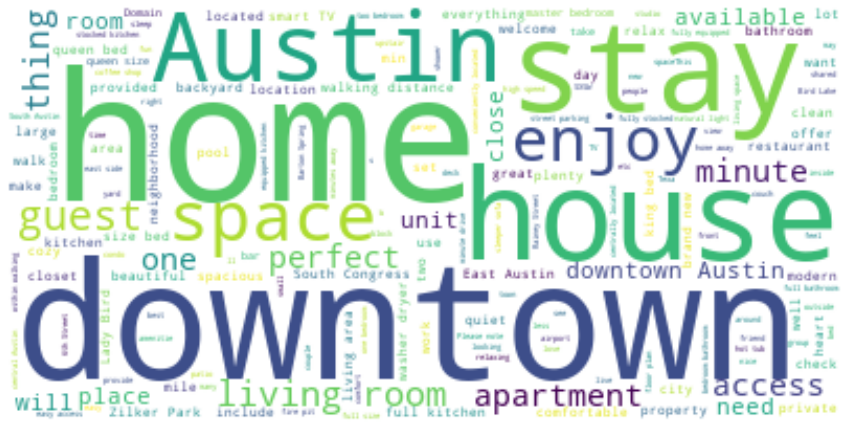

In [131]:
#Let's look at a word cloud for the description see what words are occurring the most
exclude_list = ['<b>', '</b>', '<br />']#exclude special characters
text = " ".join(word for word in df_subset['description'] if not pd.isna(word))
for exclude_char in exclude_list:
    text = text.replace(exclude_char, '')
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

What does the word cloud look like when comparing airbnb's that have 50% or more occupancy during the last 30 days versus ones that have less than 50% occupancy.

In [132]:
df_subset['percentage_aval_30'] = df_subset['availability_30'] / 30
df_50_percent_avail = df_subset.loc[df_subset['percentage_aval_30'] >= .5]
df_under_percent_avail = df_subset.loc[df_subset['percentage_aval_30'] <= .5]

In [133]:
df_subset['percentage_aval_30']

0        0.233333
1        0.000000
2        0.000000
3        0.300000
4        0.000000
           ...   
11967    1.000000
11968    0.933333
11969    0.933333
11970    0.933333
11971    0.933333
Name: percentage_aval_30, Length: 11968, dtype: float64

In [134]:
df_under_percent_avail.shape

(9204, 53)

In [136]:
df_50_percent_avail.shape

(3002, 53)

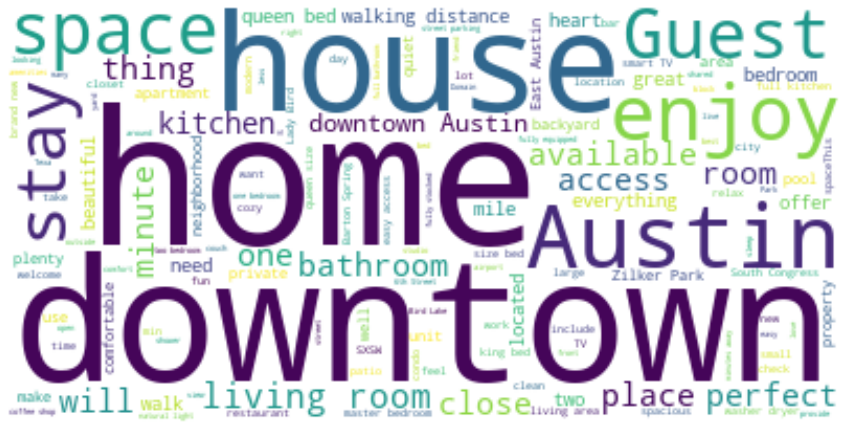

In [137]:
exclude_list = ['<b>', '</b>', '<br />']#exclude special characters
text = " ".join(word for word in df_under_percent_avail['description'] if not pd.isna(word))
for exclude_char in exclude_list:
    text = text.replace(exclude_char, '')
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

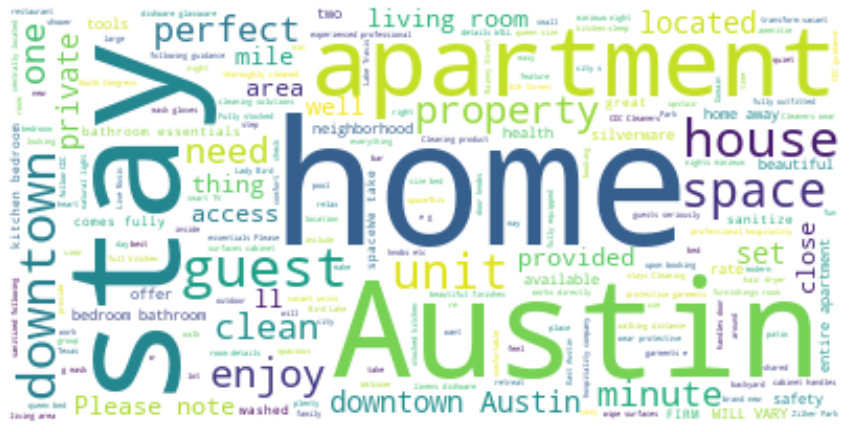

In [20]:
exclude_list = ['<b>', '</b>', '<br />']#exclude special characters
text = " ".join(word for word in df_50_percent_avail['description'] if not pd.isna(word))
for exclude_char in exclude_list:
    text = text.replace(exclude_char, '')
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Let's do the same thing with the name attribute see if we can get any insights there as well

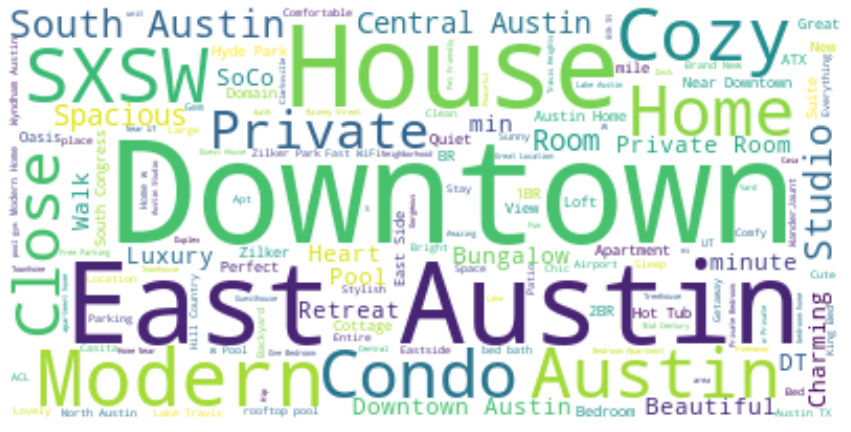

In [21]:
exclude_list = ['<b>', '</b>', '<br />']#exclude special characters
text = " ".join(word for word in df_subset['name'] if not pd.isna(word))
for exclude_char in exclude_list:
    text = text.replace(exclude_char, '')
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

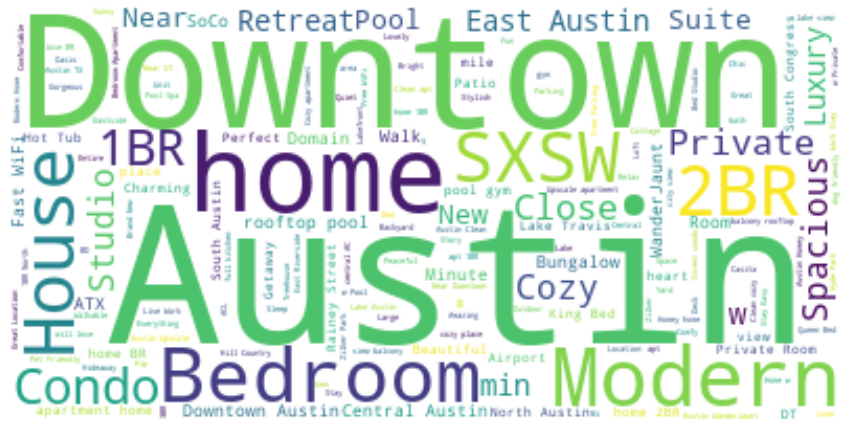

In [22]:
exclude_list = ['<b>', '</b>', '<br />']#exclude special characters
text = " ".join(word for word in df_50_percent_avail['name'] if not pd.isna(word))
for exclude_char in exclude_list:
    text = text.replace(exclude_char, '')
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

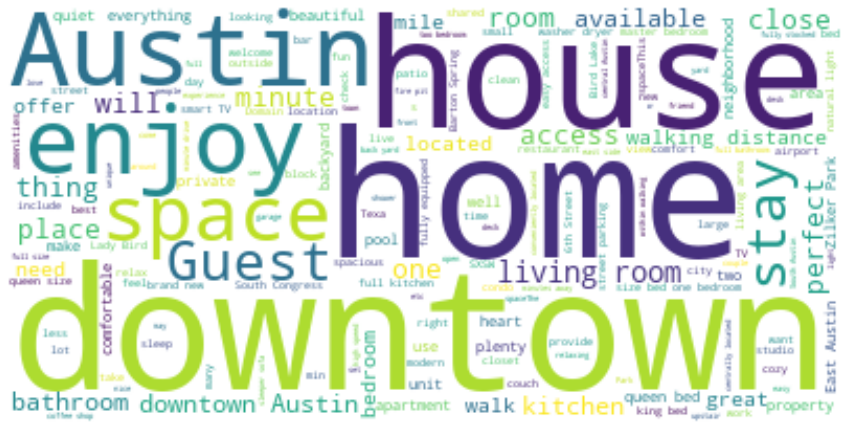

In [23]:
exclude_list = ['<b>', '</b>', '<br />']#exclude special characters
text = " ".join(word for word in df_under_percent_avail['description'] if not pd.isna(word))
for exclude_char in exclude_list:
    text = text.replace(exclude_char, '')
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Interesting some of the words that stand out from breaking the dataset down into two. I'm curious to see if there are other insights that distinguish the two. Such as on average do airbnb's that have a higher booking rate tend to get better reviews than their counterparts. Let's do a t-test to find out.

<AxesSubplot:>

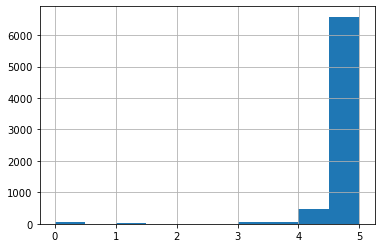

In [23]:
#Look at the distribution of the data for the two groups
df_under_percent_avail['review_scores_rating'].hist()

<AxesSubplot:>

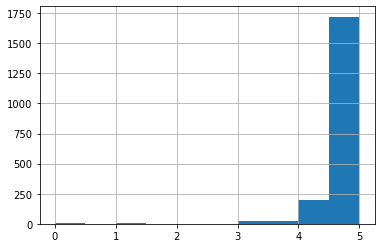

In [24]:
df_50_percent_avail['review_scores_rating'].hist()

In [25]:
df_under_percent_avail['review_scores_rating'].describe()

count    7260.000000
mean        4.766833
std         0.593792
min         0.000000
25%         4.760000
50%         4.930000
75%         5.000000
max         5.000000
Name: review_scores_rating, dtype: float64

In [26]:
df_50_percent_avail['review_scores_rating'].describe()

count    1977.000000
mean        4.736677
std         0.468766
min         0.000000
25%         4.670000
50%         4.870000
75%         5.000000
max         5.000000
Name: review_scores_rating, dtype: float64

# Stats

Looking at the data summary stats both groups don't appear to have any significant difference between them let's verify with a t-test. (Null hypothesis there is no difference between the two data sets).

In [143]:
under_50_booking_rev = df_50_percent_avail['review_scores_rating'].dropna()
over_50_booking_rev = df_under_percent_avail['review_scores_rating'].dropna()
stats.ttest_ind(under_50_booking_rev, over_50_booking_rev)

Ttest_indResult(statistic=-2.087880245942167, pvalue=0.03683597154672376)

In [144]:
under_50_booking_rev = df_50_percent_avail['percentage_aval_30'].dropna()
over_50_booking_rev = df_under_percent_avail['percentage_aval_30'].dropna()
stats.ttest_ind(under_50_booking_rev, over_50_booking_rev)

Ttest_indResult(statistic=182.63784456449915, pvalue=0.0)

With a relatively small pvalue for these attributes we can assume that these two data sets are as different as night and day, and its not by chance that they are.

# Categorical Data Transformation

Now let's convert this column into categorical variables that our ml model can understand, after we do another deep dive into some of the columns.

In [145]:
import json

In [146]:
amenties_text = list(df_50_percent_avail['amenities'])
amenties_text = list(map(lambda x: json.loads(x), amenties_text))

In [147]:
amenties_text_under = list(df_under_percent_avail['amenities'])
amenties_text_under = list(map(lambda x: json.loads(x), amenties_text_under))

In [148]:
amenties_text_full = " ".join([ ". ".join(amenities_str) for amenities_str in amenties_text ])

In [149]:
amenties_text_full_under = " ".join([ ". ".join(amenities_str_under) for amenities_str_under in amenties_text_under ])

In [150]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/micahforster/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/micahforster/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [151]:
#Remove stop words from amenities
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [152]:
stop_words = set(stopwords.words('english'))
tokenized_sent = nltk.sent_tokenize(amenties_text_full)
# filtered_sentence = [w for w in tokenized_sent if not w.lower() in stop_words]
filtered_sentence = [sent.replace(".", "") for sent in tokenized_sent]

In [153]:
stop_words = set(stopwords.words('english'))
tokenized_sent_under = nltk.sent_tokenize(amenties_text_full_under)
# filtered_sentence = [w for w in tokenized_sent if not w.lower() in stop_words]
filtered_sentence_under = [sent.replace(".", "") for sent in tokenized_sent_under]

In [154]:
from collections import Counter
avail_50_or_more = Counter(filtered_sentence)
avail_50_or_less = Counter(filtered_sentence_under)

In [155]:
avail_50_set = set([common_word[0] for common_word in avail_50_or_more.most_common(10)])
avail_50_less_set = set([common_word[0] for common_word in avail_50_or_less.most_common(10)])

In [156]:
top_amenities_set = set()
# top_amenities_set = top_amenities_set.union(avail_50_set)
top_amenities_set = avail_50_less_set.union(avail_50_set)

In [157]:
top_amenities_set

{'Air conditioning',
 'Essentials',
 'Free parking on premises',
 'Hair dryer',
 'Hangers',
 'Heating',
 'Iron',
 'Kitchen',
 'Long term stays allowed',
 'Shampoo',
 'Smoke alarm',
 'Washer',
 'Wifi'}

Very interesting the top 12 unique amenties that successful bookings have, let' see if we can create a one hot encoding of these amenties by looking up the amenities list contains these attributes. One thing to note is that not all the data will have the exact same spelling or case but we can use 'Fuzzy' matching to do comparisons with just in case.

In [158]:
#Install required lib(s) for fuzz matching
!python3 -m pip install fuzzywuzzy
!python3 -m pip install python-Levenshtein

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [159]:
#import fuzzy matching library
from fuzzywuzzy import fuzz

In [160]:
#Iterate over each of the top amenties and create one hot encoded columns
def _find_fuzzy_match(amenities_list, amenity):
    parsed_amenities_list = json.loads(amenities_list)
    for amenity_text in parsed_amenities_list:
        if fuzz.ratio(amenity.lower(), amenity_text.lower()) >= 85:
            return 1
    return 0

for amenity in top_amenities_set:
    df_subset[f'has_{amenity.lower()}'] = df_subset['amenities'].apply(lambda x: _find_fuzzy_match(x, amenity))

In [161]:
df_subset.head()

name  \
0          Walk to 6th, Rainey St and Convention Ctr   
1                                     NW Austin Room   
2                      Gem of a Studio near Downtown   
3  Secluded Studio @ Zilker - King Bed, Bright & ...   
4                            Woodland Studio Lodging   

                                         description  \
0  Great central  location for walking to Convent...   
1  <b>The space</b><br />Looking for a comfortabl...   
2  Great studio apartment, perfect a single perso...   
3  Clean, private space with everything you need ...   
4  <b>The space</b><br />Fully furnished suite wi...   

                               neighborhood_overview  host_name  host_since  \
0  My neighborhood is ideally located if you want...     Sylvia  2009-02-16   
1  Quiet neighborhood with lots of trees and good...  Elizabeth  2009-02-19   
2  Travis Heights is one of the oldest neighborho...       Todd  2009-04-17   
3  The neighborhood is fun and funky (but quiet)!...        Amy  2009-04-20   
4                                                NaN      Karen  2009-07-11   

                  host_location  \
0  Austin, Texas, United States   
1  Austin, Texas, United States   
2  Austin, Texas, United States   
3  Austin, Texas, United States   
4  Austin, Texas, United States   

                                          host_about host_response_time  \
0  I am a licensed Real Estate Broker and owner o...     within an hour   
1  We're easygoing professionals that enjoy meeti...                NaN   
2  We're a young family that likes to travel, we ...     within an hour   
3  We are a family of four (with teenagers, all o...     within an hour   
4  I handle the reservations at the studio on the...       within a day   

  host_response_rate host_acceptance_rate  ...  has_air conditioning  \
0               100%                  94%  ...                     1   
1                NaN                 100%  ...                     1   
2               100%                 100%  ...                     1   
3               100%                  98%  ...                     0   
4                83%                  29%  ...                     1   

  has_smoke alarm  has_essentials  has_iron  has_free parking on premises  \
0               1               1         1                             0   
1               1               1         0                             1   
2               1               1         1                             1   
3               1               1         1                             1   
4               1               1         0                             0   

   has_hangers has_hair dryer  has_washer  has_long term stays allowed  \
0            1              1           0                            1   
1            0              1           0                            0   
2            1              1           0                            1   
3            1              1           0                            1   
4            0              1           0                            1   

   has_wifi  
0         1  
1         1  
2         1  
3         1  
4         1  

[5 rows x 66 columns]

Let's go ahead and drop the amenities column since we have extracted the useful info from it

In [162]:
df_subset.drop(columns=['amenities'], inplace=True)

In [163]:
#import stats lib for tests
import scipy.stats as stats

Let's do a pairwise pearson correlation of the data to see what features have a strong correlation to our target variable (price)

<AxesSubplot:>

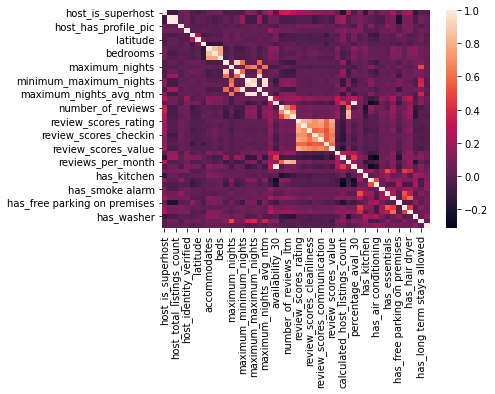

In [164]:
#heatmap visual for feature corelation
sns.heatmap(df_subset.corr())

In [165]:
df_subset['neighbourhood'].unique()

array(['Austin, Texas, United States', nan, 'United States',
       'West Lake Hills, Texas, United States',
       'Volente, Texas, United States', 'Manchaca, Texas, United States',
       'Dripping Springs, Texas, United States',
       'Lakeway, Texas, United States',
       'Sunset Valley, Texas, United States',
       'Lago Vista, Texas, United States',
       'Bouldin, Austin, Texas, United States',
       'Manor, Austin, Texas, United States',
       'Round Rock, Texas, United States',
       'Austin , Texas, United States',
       'Rollingwood, Texas, United States',
       'Westlake Hills, Austin, Texas, United States',
       'Austin, United States', 'Buda, Texas, United States',
       'Del Valle, Texas, United States',
       'The Hills, Texas, United States',
       'Clarksville, Texas, United States',
       'Pflugerville, Texas, United States',
       'Manor, Texas, United States', 'Austin, Tx, United States',
       'Lake Travis, Texas, United States',
       'Cedar Par

Let's adjust the the 'Nan' values for the neighborhood column, by giving a placeholder string such as 'NA'

In [166]:
# df_subset.loc[df_subset['neighbourhood'] == 'N/A', 'neighbourhood'] = 'United States'
df_subset['neighbourhood'] = df_subset['neighbourhood'].fillna('United States')

In [167]:
df_subset['neighbourhood'].unique()

array(['Austin, Texas, United States', 'United States',
       'West Lake Hills, Texas, United States',
       'Volente, Texas, United States', 'Manchaca, Texas, United States',
       'Dripping Springs, Texas, United States',
       'Lakeway, Texas, United States',
       'Sunset Valley, Texas, United States',
       'Lago Vista, Texas, United States',
       'Bouldin, Austin, Texas, United States',
       'Manor, Austin, Texas, United States',
       'Round Rock, Texas, United States',
       'Austin , Texas, United States',
       'Rollingwood, Texas, United States',
       'Westlake Hills, Austin, Texas, United States',
       'Austin, United States', 'Buda, Texas, United States',
       'Del Valle, Texas, United States',
       'The Hills, Texas, United States',
       'Clarksville, Texas, United States',
       'Pflugerville, Texas, United States',
       'Manor, Texas, United States', 'Austin, Tx, United States',
       'Lake Travis, Texas, United States',
       'Cedar Park, Te

In [168]:
df_subset['neighbourhood'].nunique()

28

I would like to view the wordcloud for the neighborhood as well.

In [169]:
df_under_percent_avail['neighbourhood']

0        Austin, Texas, United States
1        Austin, Texas, United States
2        Austin, Texas, United States
3        Austin, Texas, United States
4                                 NaN
                     ...             
11952    Austin, Texas, United States
11953    Austin, Texas, United States
11962    Austin, Texas, United States
11963                             NaN
11964                             NaN
Name: neighbourhood, Length: 9204, dtype: object

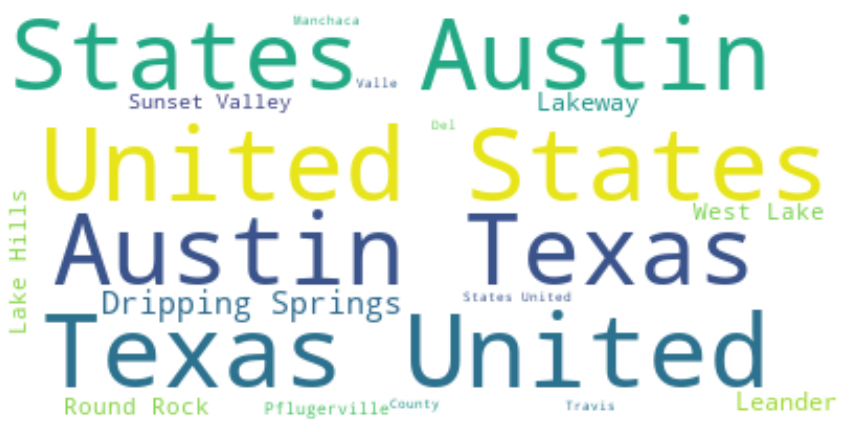

In [30]:
exclude_list = ['<b>', '</b>', '<br />']#exclude special characters
text = " ".join(df_50_percent_avail.loc[df_50_percent_avail['neighbourhood'].notnull(), 'neighbourhood'])
for exclude_char in exclude_list:
    text = text.replace(exclude_char, '')
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

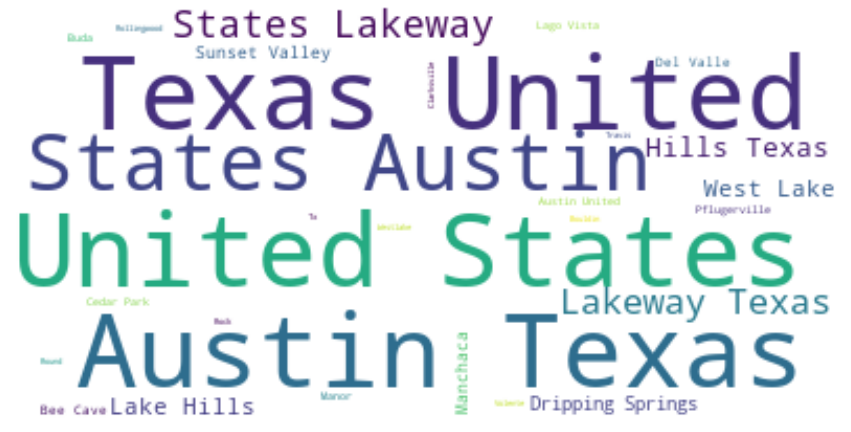

In [29]:
exclude_list = ['<b>', '</b>', '<br />']#exclude special characters
text = " ".join(df_under_percent_avail.loc[df_under_percent_avail['neighbourhood'].notnull(), 'neighbourhood'])
for exclude_char in exclude_list:
    text = text.replace(exclude_char, '')
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Just out of curiousity let's view the wordclouds for the amenties as well

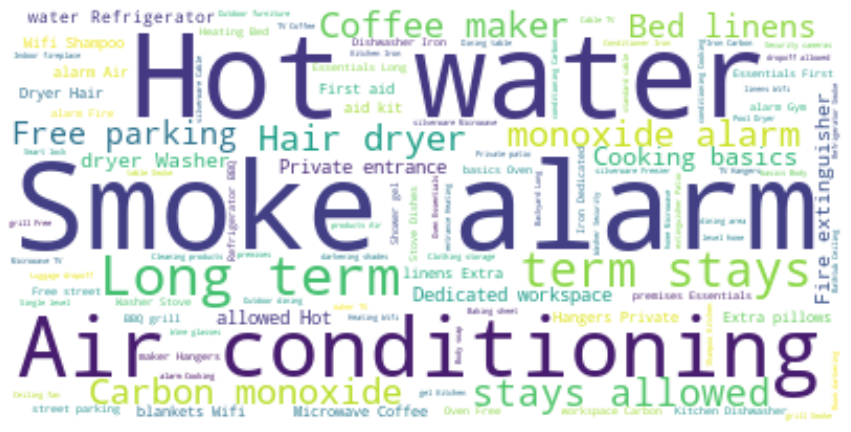

In [72]:
exclude_list = ['<b>', '</b>', '<br />']#exclude special characters
text = " ".join(word for word in df_50_percent_avail['amenities'] if not pd.isna(word))
for exclude_char in exclude_list:
    text = text.replace(exclude_char, '')
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

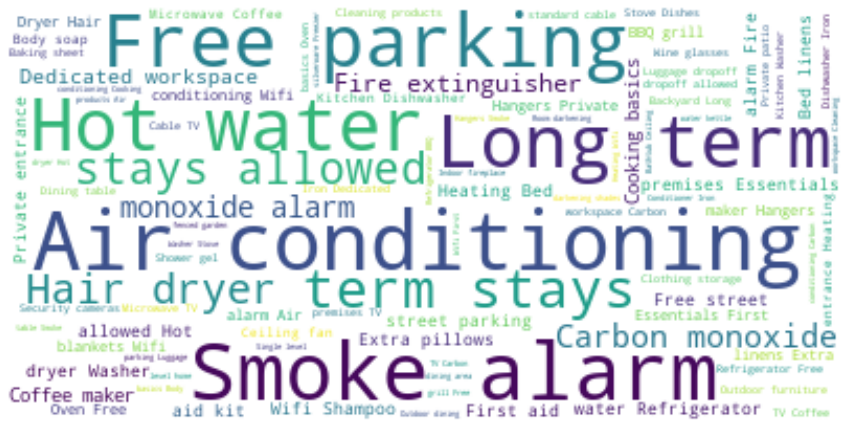

In [74]:
exclude_list = ['<b>', '</b>', '<br />']#exclude special characters
text = " ".join(word for word in df_under_percent_avail['amenities'] if not pd.isna(word))
for exclude_char in exclude_list:
    text = text.replace(exclude_char, '')
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Next is looking at the property types that are trending in the data

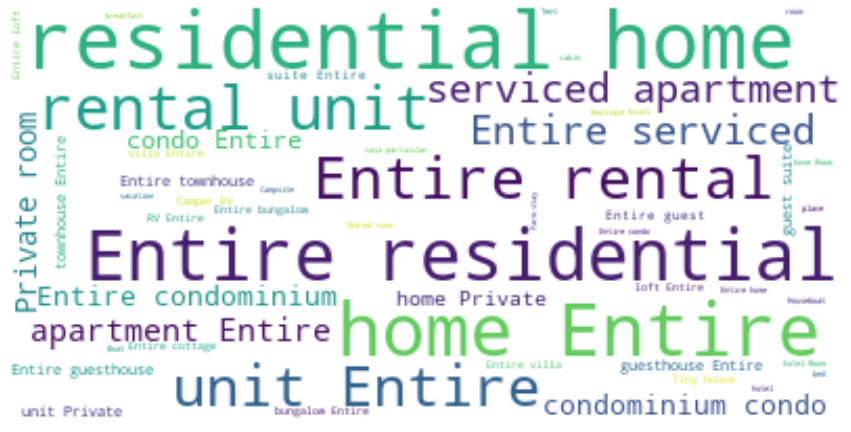

In [75]:
exclude_list = ['<b>', '</b>', '<br />']#exclude special characters
text = " ".join(word for word in df_50_percent_avail['property_type'] if not pd.isna(word))
for exclude_char in exclude_list:
    text = text.replace(exclude_char, '')
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

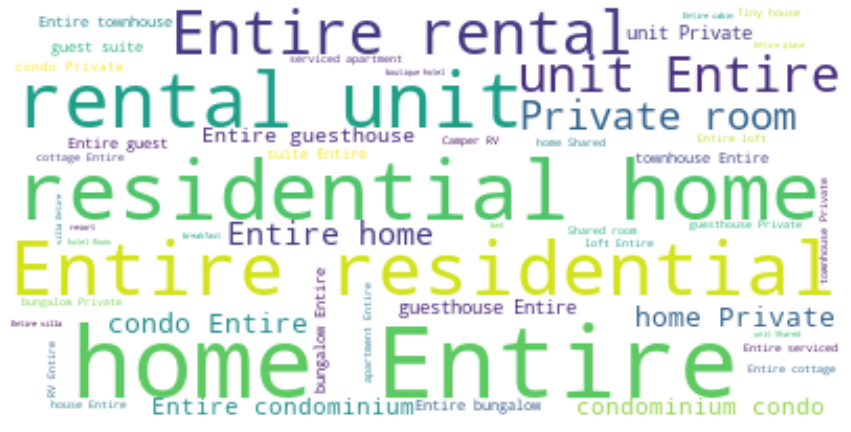

In [76]:
exclude_list = ['<b>', '</b>', '<br />']#exclude special characters
text = " ".join(word for word in df_under_percent_avail['property_type'] if not pd.isna(word))
for exclude_char in exclude_list:
    text = text.replace(exclude_char, '')
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Very interesting insight, by the end of the day regardless of the booking rates it appears that the majority of the residences are providing entire residence spaces versus shared spaces. Let's see if we can create another column in the data that says whether or not the residence is an entire space or not.

In [170]:
import re

In [171]:
df_subset['property_type'].str.contains('Entire',flags=re.IGNORECASE, regex=True)

0         True
1        False
2         True
3         True
4         True
         ...  
11967     True
11968     True
11969     True
11970     True
11971     True
Name: property_type, Length: 11968, dtype: bool

In [172]:
def _match_property_type_entire_space(prop_type):
    entire_space = bool(re.search('Entire', prop_type, re.IGNORECASE))
    return 1 if entire_space else 0
# df_subset['entire_space'] = 0
# df_subset['entire_space'] = 1 if df_subset['property_type'].str.contains('Entire', flags=re.IGNORECASE, regex=True) else 0
df_subset['entire_space'] = df_subset['property_type'].apply(_match_property_type_entire_space)

In [173]:
df_subset['entire_space']

0        1
1        0
2        1
3        1
4        1
        ..
11967    1
11968    1
11969    1
11970    1
11971    1
Name: entire_space, Length: 11968, dtype: int64

Now let's convert this column into categorical variables that our ml model can understand

In [174]:
df_dummy = pd.get_dummies(df_subset, columns=['neighbourhood'])
df_dummy.head()

name  \
0          Walk to 6th, Rainey St and Convention Ctr   
1                                     NW Austin Room   
2                      Gem of a Studio near Downtown   
3  Secluded Studio @ Zilker - King Bed, Bright & ...   
4                            Woodland Studio Lodging   

                                         description  \
0  Great central  location for walking to Convent...   
1  <b>The space</b><br />Looking for a comfortabl...   
2  Great studio apartment, perfect a single perso...   
3  Clean, private space with everything you need ...   
4  <b>The space</b><br />Fully furnished suite wi...   

                               neighborhood_overview  host_name  host_since  \
0  My neighborhood is ideally located if you want...     Sylvia  2009-02-16   
1  Quiet neighborhood with lots of trees and good...  Elizabeth  2009-02-19   
2  Travis Heights is one of the oldest neighborho...       Todd  2009-04-17   
3  The neighborhood is fun and funky (but quiet)!...        Amy  2009-04-20   
4                                                NaN      Karen  2009-07-11   

                  host_location  \
0  Austin, Texas, United States   
1  Austin, Texas, United States   
2  Austin, Texas, United States   
3  Austin, Texas, United States   
4  Austin, Texas, United States   

                                          host_about host_response_time  \
0  I am a licensed Real Estate Broker and owner o...     within an hour   
1  We're easygoing professionals that enjoy meeti...                NaN   
2  We're a young family that likes to travel, we ...     within an hour   
3  We are a family of four (with teenagers, all o...     within an hour   
4  I handle the reservations at the studio on the...       within a day   

  host_response_rate host_acceptance_rate  ...  \
0               100%                  94%  ...   
1                NaN                 100%  ...   
2               100%                 100%  ...   
3               100%                  98%  ...   
4                83%                  29%  ...   

   neighbourhood_Pflugerville, Texas, United States  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

  neighbourhood_Rollingwood, Texas, United States  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   neighbourhood_Round Rock, Texas, United States  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   neighbourhood_Sunset Valley, Texas, United States  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   neighbourhood_The Hills, Texas, United States  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   neighbourhood_Travis County, Texas, United States  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                    

In [175]:
df_dummy['percentage_aval_30']

0        0.233333
1        0.000000
2        0.000000
3        0.300000
4        0.000000
           ...   
11967    1.000000
11968    0.933333
11969    0.933333
11970    0.933333
11971    0.933333
Name: percentage_aval_30, Length: 11968, dtype: float64

# Scaling the Data Appropriately

First things first, before applying scaling to our dataset we must first split it into training and test. After that is done we will train the scaler with our training data fit it to our training data and then fit our test data with this scaler.

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [95]:
scaler = StandardScaler()

One thing to note before we do we should also change the price column to ensure it is using float instead of a string

In [179]:
df_dummy['price'] = df_dummy['price'].str.replace('$', '')
df_dummy['price'] = df_dummy['price'].str.replace(',', '')
df_dummy['price'] = df_dummy['price'].astype(float)
df_dummy['price'].head()

/var/folders/80/rkdybljd1sz7w37r3nrwjnqw0000gn/T/ipykernel_31435/825082311.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_dummy['price'] = df_dummy['price'].str.replace('$', '')


0    240.0
1     42.0
2    109.0
3    325.0
4     44.0
Name: price, dtype: float64

In [180]:
df_dummy['price'].describe()

count    11968.000000
mean       341.422042
std        571.210564
min          0.000000
25%        117.000000
50%        200.000000
75%        361.000000
max      20000.000000
Name: price, dtype: float64

In [182]:
df_dummy.drop(columns=['availability_30'], inplace=True) #converted to a percentage no longer need this column

In [184]:
df_dummy.columns.tolist()

['name',
 'description',
 'neighborhood_overview',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'has_availability',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instan

In [185]:
#Drop unneccessary columns
df_dummy.drop(columns=['bathrooms_text', 'description', 'host_about', 'host_acceptance_rate', 'host_location', 'host_name', 'host_neighbourhood', 'host_response_time', 'host_response_rate', 'host_since', 'last_review', 'name', 'neighborhood_overview', 'neighbourhood_cleansed', 'room_type', 'property_type'], inplace=True)

In [186]:
#Save df_dummy for modeling
df_dummy.to_csv("modeling_phase.csv", index=False)

In [109]:
X = df_dummy.loc[:, ~df_dummy.columns.isin(['percentage_aval_30'])]
y = df_dummy['percentage_aval_30']

In [104]:
df_dummy.drop(columns=['bathrooms_text', 'description', 'host_about', 'host_acceptance_rate', 'host_location', 'host_name', 'host_neighbourhood', 'host_response_time', 'host_response_rate', 'host_since', 'last_review', 'name', 'neighborhood_overview', 'neighbourhood_cleansed', 'room_type'], inplace=True)

KeyError: "['bathrooms_text', 'description', 'host_about', 'host_acceptance_rate', 'host_location', 'host_name', 'host_neighbourhood', 'host_response_time', 'host_response_rate', 'host_since', 'last_review', 'name', 'neighborhood_overview', 'neighbourhood_cleansed', 'room_type'] not found in axis"

In [110]:
X.head()

host_is_superhost  host_listings_count  host_total_listings_count  \
0                  1                  1.0                        1.0   
1                  1                  1.0                        1.0   
2                  1                  1.0                        1.0   
3                  1                  2.0                        2.0   
4                  0                  1.0                        1.0   

   host_has_profile_pic  host_identity_verified  latitude  longitude  \
0                     1                       1  30.26057  -97.73441   
1                     1                       1  30.45697  -97.78422   
2                     1                       1  30.24885  -97.73587   
3                     1                       1  30.26034  -97.76487   
4                     1                       0  30.23466  -97.73682   

   accommodates  bedrooms  beds  ...  has_smoke alarm  has_essentials  \
0             3       1.0   2.0  ...                1               1   
1             2       1.0   1.0  ...                1               1   
2             2       NaN   1.0  ...                1               1   
3             3       1.0   2.0  ...                1               1   
4             2       1.0   1.0  ...                1               1   

   has_iron  has_free parking on premises  has_hangers  has_hair dryer  \
0         1                             0            1               1   
1         0                             1            0               1   
2         1                             1            1               1   
3         1                             1            1               1   
4         0                             0            0               1   

   has_washer  has_long term stays allowed  has_wifi  entire_space  
0           0                            1         1             1  
1           0                            0         1             0  
2           0                            1         1             1  
3           0                            1         1             1  
4           0                            1         1             1  

[5 rows x 47 columns]

In [111]:
y.head()

0    0.233333
1    0.000000
2    0.000000
3    0.300000
4    0.000000
Name: percentage_aval_30, dtype: float64

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=43)

In [113]:
X_train['price'].shape

(8018,)

In [114]:
price_train = np.asarray(X_train['price'])
price_train = price_train.reshape(-1, 1)
X_train['price'] = scaler.fit_transform(price_train)
# X_train['price'] = scaler.transform(X_train['price'])

In [115]:
X_train.head()

host_is_superhost  host_listings_count  host_total_listings_count  \
5457                   1                  2.0                        2.0   
11258                  0                 34.0                       34.0   
5695                   0                  1.0                        1.0   
6512                   1                  1.0                        1.0   
10417                  0                  0.0                        0.0   

       host_has_profile_pic  host_identity_verified  latitude  longitude  \
5457                      1                       0  30.49002  -97.73799   
11258                     1                       1  30.29092  -97.74797   
5695                      1                       1  30.25991  -97.71336   
6512                      1                       1  30.41643  -97.69413   
10417                     1                       1  30.41702  -97.65430   

       accommodates  bedrooms  beds  ...  has_smoke alarm  has_essentials  \
5457             13       3.0   8.0  ...                1               1   
11258             4       1.0   2.0  ...                1               0   
5695              6       3.0   3.0  ...                1               1   
6512              2       1.0   1.0  ...                1               1   
10417             8       3.0   5.0  ...                1               1   

       has_iron  has_free parking on premises  has_hangers  has_hair dryer  \
5457          1                             1            1               1   
11258         0                             0            0               0   
5695          1                             1            1               1   
6512          1                             1            1               0   
10417         1                             1            1               1   

       has_washer  has_long term stays allowed  has_wifi  entire_space  
5457            1                            1         1             1  
11258           1                            1         1             1  
5695            1                            0         1             0  
6512            0                            1         1             1  
10417           1                            1         1             1  

[5 rows x 47 columns]

In [147]:
price_test = np.asarray(X_test['price'])
price_test = price_test.reshape(-1, 1)
X_test['price'] = scaler.transform(price_test)

/tmp/ipykernel_564661/2519033808.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['price'] = scaler.transform(price_test)


In [148]:
X_test['price'].head()

8456    -0.321893
10121   -0.475949
312      1.193292
2881    -0.437888
1433    -0.077216
Name: price, dtype: float64

In [116]:
y_train = pd.DataFrame(y_train, columns=['percentage_aval_30'])

In [117]:
y_train.head()

percentage_aval_30
5457             0.400000
11258            0.700000
5695             0.433333
6512             0.033333
10417            0.000000

In [118]:
y_train.head()

percentage_aval_30
5457             0.400000
11258            0.700000
5695             0.433333
6512             0.033333
10417            0.000000

# Conclusion

Great we've successfully taken our data and created categorical features and scaled the values appropriately for our ml model!! 